## Generate QC report of the whole image quality control flags

## Import libraries

In [1]:
import pandas as pd
import pathlib
import re

import seaborn as sns
from upsetplot import from_indicators, plot
import matplotlib.pyplot as plt

import warnings

# Ignore upset plot warning regarding  behavior change that will occur in pandas 3.0
warnings.filterwarnings("ignore", category=FutureWarning, module="upsetplot")

# Set paths and load in data

In [2]:
# Batch name for processing
batch_name = "batch_2"

# Output directory for plots
output_directory = pathlib.Path(f"./qc_plots/{batch_name}")
output_directory.mkdir(exist_ok=True)

# path to illumination directory with the qc results and ic functions
illum_directory = pathlib.Path(f"../illum_directory/{batch_name}")

# Find all Image.csv files in the directory
csv_files = list(illum_directory.rglob("Image.csv"))

# Load and concatenate all CSV files
prefixes = ("Metadata_", "ImageQuality_PercentMaximal", "ImageQuality_PowerLogLogSlope")
dataframes = [
    pd.read_csv(csv_file, usecols=lambda col: col.startswith(prefixes))
    for csv_file in csv_files
]
combined_df = pd.concat(dataframes, ignore_index=True)

print(combined_df.shape)
combined_df.head()

(11760, 19)


,ImageQuality_PercentMaximal_OrigActin,ImageQuality_PercentMaximal_OrigDNA,ImageQuality_PercentMaximal_OrigER,ImageQuality_PercentMaximal_OrigMito,ImageQuality_PercentMaximal_OrigPM,ImageQuality_PowerLogLogSlope_OrigActin,ImageQuality_PowerLogLogSlope_OrigDNA,ImageQuality_PowerLogLogSlope_OrigER,ImageQuality_PowerLogLogSlope_OrigMito,ImageQuality_PowerLogLogSlope_OrigPM,Metadata_Blur_Flag,Metadata_Channel,Metadata_FileLocation,Metadata_Frame,Metadata_Plate,Metadata_Saturation_Flag,Metadata_Series,Metadata_Site,Metadata_Well
0,0.013045,0.000082,0.002954,0.024286,0.001887,-1.643552,-2.121207,-1.851892,-1.881740,-2.167453,0,NaN,NaN,0,CARD-CelIns-CX7_250528090001,0,0,f00,B02
1,0.465041,0.010010,0.000082,1.331456,0.891931,-1.716559,-2.106787,-1.847724,-1.974776,-2.137166,0,NaN,NaN,0,CARD-CelIns-CX7_250528090001,1,0,f01,B02
2,0.000082,0.000082,0.000082,0.000082,0.000082,-1.026020,-1.916047,-1.730016,-2.187313,-2.161198,1,NaN,NaN,0,CARD-CelIns-CX7_250528090001,0,0,f02,B02
3,0.000082,0.000082,0.000082,0.009271,0.000082,-0.998334,-1.925255,-1.789633,-1.838117,-2.040261,0,NaN,NaN,0,CARD-CelIns-CX7_250528090001,0,0,f03,B02
4,0.000082,0.000082,0.000082,0.000082,0.000082,-1.596933,-2.278827,-2.087902,-2.287905,-2.360931,1,NaN,NaN,0,CARD-CelIns-CX7_250528090001,0,0,f04,B02


## Update plate names to be easier to read

In [3]:
# Extract numeric suffixes directly into a list
plate_names = combined_df["Metadata_Plate"].unique()
numeric_suffixes = [int(re.search(r"(\d+)$", name).group(1)) for name in plate_names]

# Zip names with their numeric part, sort by numeric value
sorted_plates = [name for _, name in sorted(zip(numeric_suffixes, plate_names))]

# Create the mapping to Plate_1, Plate_2, ...
plate_mapping = {name: f"Plate_{i+1}" for i, name in enumerate(sorted_plates)}

# Apply mapping
combined_df["Metadata_Plate"] = combined_df["Metadata_Plate"].map(plate_mapping)

print(combined_df.shape)
combined_df.head()

(11760, 19)


,ImageQuality_PercentMaximal_OrigActin,ImageQuality_PercentMaximal_OrigDNA,ImageQuality_PercentMaximal_OrigER,ImageQuality_PercentMaximal_OrigMito,ImageQuality_PercentMaximal_OrigPM,ImageQuality_PowerLogLogSlope_OrigActin,ImageQuality_PowerLogLogSlope_OrigDNA,ImageQuality_PowerLogLogSlope_OrigER,ImageQuality_PowerLogLogSlope_OrigMito,ImageQuality_PowerLogLogSlope_OrigPM,Metadata_Blur_Flag,Metadata_Channel,Metadata_FileLocation,Metadata_Frame,Metadata_Plate,Metadata_Saturation_Flag,Metadata_Series,Metadata_Site,Metadata_Well
0,0.013045,0.000082,0.002954,0.024286,0.001887,-1.643552,-2.121207,-1.851892,-1.881740,-2.167453,0,NaN,NaN,0,Plate_1,0,0,f00,B02
1,0.465041,0.010010,0.000082,1.331456,0.891931,-1.716559,-2.106787,-1.847724,-1.974776,-2.137166,0,NaN,NaN,0,Plate_1,1,0,f01,B02
2,0.000082,0.000082,0.000082,0.000082,0.000082,-1.026020,-1.916047,-1.730016,-2.187313,-2.161198,1,NaN,NaN,0,Plate_1,0,0,f02,B02
3,0.000082,0.000082,0.000082,0.009271,0.000082,-0.998334,-1.925255,-1.789633,-1.838117,-2.040261,0,NaN,NaN,0,Plate_1,0,0,f03,B02
4,0.000082,0.000082,0.000082,0.000082,0.000082,-1.596933,-2.278827,-2.087902,-2.287905,-2.360931,1,NaN,NaN,0,Plate_1,0,0,f04,B02


## Add flags per channel

In [4]:
# Start by assuming no channel is flagged
combined_df["Flagged_Saturation_Channel"] = "none"

# Set the columns for percent maximal (saturation)
percent_max_cols = [
    col for col in combined_df.columns if col.startswith("ImageQuality_PercentMaximal")
]

# Boolean mask where the Saturation flag is on
saturation_flagged_mask = combined_df["Metadata_Saturation_Flag"].astype(bool)

# Iterate through each PercentMaximal column and create a new boolean column per channel
for col in percent_max_cols:
    channel = col.replace("ImageQuality_PercentMaximal_", "")
    combined_df[f"{channel}_Saturated"] = saturation_flagged_mask & (
        combined_df[col] > 0.10
    )

print(combined_df.shape)
combined_df.head()

(11760, 25)


,ImageQuality_PercentMaximal_OrigActin,ImageQuality_PercentMaximal_OrigDNA,ImageQuality_PercentMaximal_OrigER,ImageQuality_PercentMaximal_OrigMito,ImageQuality_PercentMaximal_OrigPM,ImageQuality_PowerLogLogSlope_OrigActin,ImageQuality_PowerLogLogSlope_OrigDNA,ImageQuality_PowerLogLogSlope_OrigER,ImageQuality_PowerLogLogSlope_OrigMito,ImageQuality_PowerLogLogSlope_OrigPM,...,Metadata_Saturation_Flag,Metadata_Series,Metadata_Site,Metadata_Well,Flagged_Saturation_Channel,OrigActin_Saturated,OrigDNA_Saturated,OrigER_Saturated,OrigMito_Saturated,OrigPM_Saturated
0,0.013045,0.000082,0.002954,0.024286,0.001887,-1.643552,-2.121207,-1.851892,-1.881740,-2.167453,...,0,0,f00,B02,none,False,False,False,False,False
1,0.465041,0.010010,0.000082,1.331456,0.891931,-1.716559,-2.106787,-1.847724,-1.974776,-2.137166,...,1,0,f01,B02,none,True,False,False,True,True
2,0.000082,0.000082,0.000082,0.000082,0.000082,-1.026020,-1.916047,-1.730016,-2.187313,-2.161198,...,0,0,f02,B02,none,False,False,False,False,False
3,0.000082,0.000082,0.000082,0.009271,0.000082,-0.998334,-1.925255,-1.789633,-1.838117,-2.040261,...,0,0,f03,B02,none,False,False,False,False,False
4,0.000082,0.000082,0.000082,0.000082,0.000082,-1.596933,-2.278827,-2.087902,-2.287905,-2.360931,...,0,0,f04,B02,none,False,False,False,False,False


In [5]:
# dictionary with blur thresholds per channel
blur_thresholds = {
    "OrigActin": -1.8891791699802942,
    "OrigDNA": -2.2456075474546515,
    "OrigER": -2.2825812279725524,
    "OrigMito": -2.012531942517173,
    "OrigPM": -2.4309820530015642,
}

# Boolean mask for Blur flag
blur_flagged_mask = combined_df["Metadata_Blur_Flag"].astype(bool)

# Iterate through PowerLogLogSlope columns and apply thresholds
for col in combined_df.columns:
    if col.startswith("ImageQuality_PowerLogLogSlope_"):
        channel = col.replace("ImageQuality_PowerLogLogSlope_", "")
        if channel in blur_thresholds:
            threshold = blur_thresholds[channel]
            combined_df[f"{channel}_Blur"] = blur_flagged_mask & (
                combined_df[col] < threshold
            )

print(combined_df.shape)
combined_df.head()

(11760, 30)


,ImageQuality_PercentMaximal_OrigActin,ImageQuality_PercentMaximal_OrigDNA,ImageQuality_PercentMaximal_OrigER,ImageQuality_PercentMaximal_OrigMito,ImageQuality_PercentMaximal_OrigPM,ImageQuality_PowerLogLogSlope_OrigActin,ImageQuality_PowerLogLogSlope_OrigDNA,ImageQuality_PowerLogLogSlope_OrigER,ImageQuality_PowerLogLogSlope_OrigMito,ImageQuality_PowerLogLogSlope_OrigPM,...,OrigActin_Saturated,OrigDNA_Saturated,OrigER_Saturated,OrigMito_Saturated,OrigPM_Saturated,OrigActin_Blur,OrigDNA_Blur,OrigER_Blur,OrigMito_Blur,OrigPM_Blur
0,0.013045,0.000082,0.002954,0.024286,0.001887,-1.643552,-2.121207,-1.851892,-1.881740,-2.167453,...,False,False,False,False,False,False,False,False,False,False
1,0.465041,0.010010,0.000082,1.331456,0.891931,-1.716559,-2.106787,-1.847724,-1.974776,-2.137166,...,True,False,False,True,True,False,False,False,False,False
2,0.000082,0.000082,0.000082,0.000082,0.000082,-1.026020,-1.916047,-1.730016,-2.187313,-2.161198,...,False,False,False,False,False,False,False,False,True,False
3,0.000082,0.000082,0.000082,0.009271,0.000082,-0.998334,-1.925255,-1.789633,-1.838117,-2.040261,...,False,False,False,False,False,False,False,False,False,False
4,0.000082,0.000082,0.000082,0.000082,0.000082,-1.596933,-2.278827,-2.087902,-2.287905,-2.360931,...,False,False,False,False,False,False,True,False,True,False


## Plot the percentage of failed FOVs across plates regardless of condition

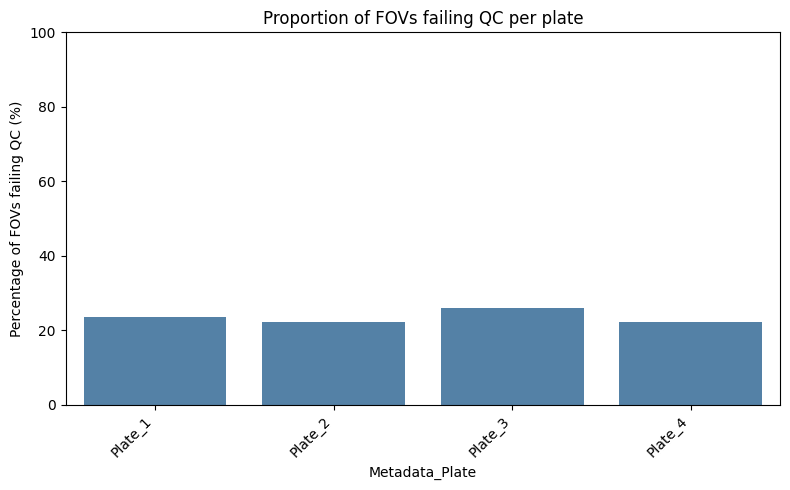

In [6]:
# Calculate percentage of rows that failed any QC check, grouped by plate
combined_df["Failed_Any"] = combined_df[
    ["Metadata_Blur_Flag", "Metadata_Saturation_Flag"]
].any(axis=1)
failed_percent_by_plate = (
    combined_df.groupby("Metadata_Plate")["Failed_Any"]
    .mean()
    .reset_index(name="Percent_Failed")
)
failed_percent_by_plate["Percent_Failed"] *= 100

# Create bar plot with a single color
plt.figure(figsize=(8, 5))
sns.barplot(
    data=failed_percent_by_plate,
    x="Metadata_Plate",
    y="Percent_Failed",
    color="steelblue",
)
plt.ylabel("Percentage of FOVs failing QC (%)")
plt.title("Proportion of FOVs failing QC per plate")
plt.ylim(0, 100)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig(output_directory / "qc_failure_rate_per_plate.png", dpi=500)
plt.show()

## Plot percentage failed FOV based on blur or saturation regardless of channel

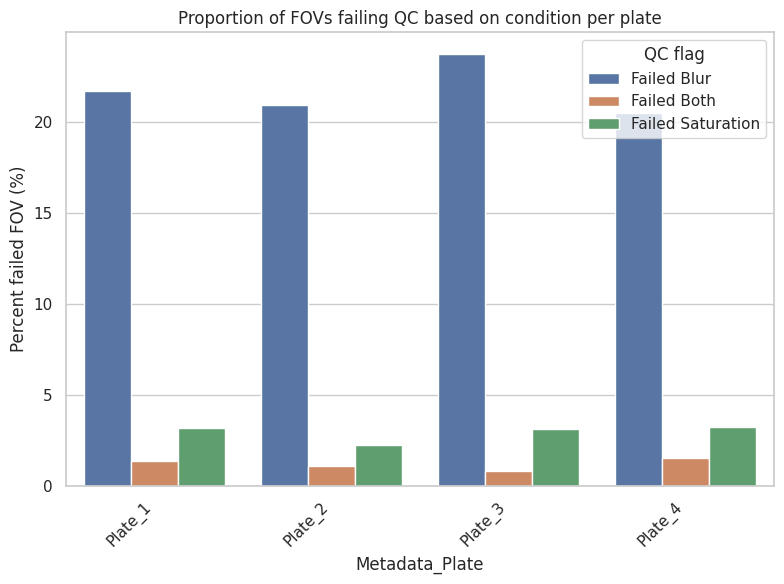

In [7]:
# Add a column for "failed both"
combined_df["Failed_Both"] = combined_df["Metadata_Saturation_Flag"].astype(
    bool
) & combined_df["Metadata_Blur_Flag"].astype(bool)

# Melt all three flag columns
flag_counts = combined_df.melt(
    id_vars="Metadata_Plate",
    value_vars=["Metadata_Saturation_Flag", "Metadata_Blur_Flag", "Failed_Both"],
    var_name="QC_Flag",
    value_name="Flagged",
)

# Convert to boolean if needed
flag_counts["Flagged"] = flag_counts["Flagged"].astype(bool)

# Clean up the legend labels
flag_counts["QC_Flag"] = flag_counts["QC_Flag"].map(
    {
        "Metadata_Saturation_Flag": "Failed Saturation",
        "Metadata_Blur_Flag": "Failed Blur",
        "Failed_Both": "Failed Both",
    }
)

# Count total per plate per flag type
total_counts = (
    flag_counts.groupby(["Metadata_Plate", "QC_Flag"]).size().reset_index(name="Total")
)

# Count number of failed flags
fail_counts = (
    flag_counts[flag_counts["Flagged"]]
    .groupby(["Metadata_Plate", "QC_Flag"])
    .size()
    .reset_index(name="Failed")
)

# Merge and compute percentage
qc_summary = pd.merge(
    total_counts, fail_counts, on=["Metadata_Plate", "QC_Flag"], how="left"
).fillna(0)
qc_summary["Percent_Failed"] = (qc_summary["Failed"] / qc_summary["Total"]) * 100

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=qc_summary, x="Metadata_Plate", y="Percent_Failed", hue="QC_Flag")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent failed FOV (%)")
plt.title("Proportion of FOVs failing QC based on condition per plate")
plt.legend(title="QC flag")
plt.tight_layout()
plt.savefig(output_directory / "qc_failure_rate_by_flag_type_per_plate.png", dpi=500)
plt.show()

## Create upset plot for all plates in combination with the breakdown of channels failing QC

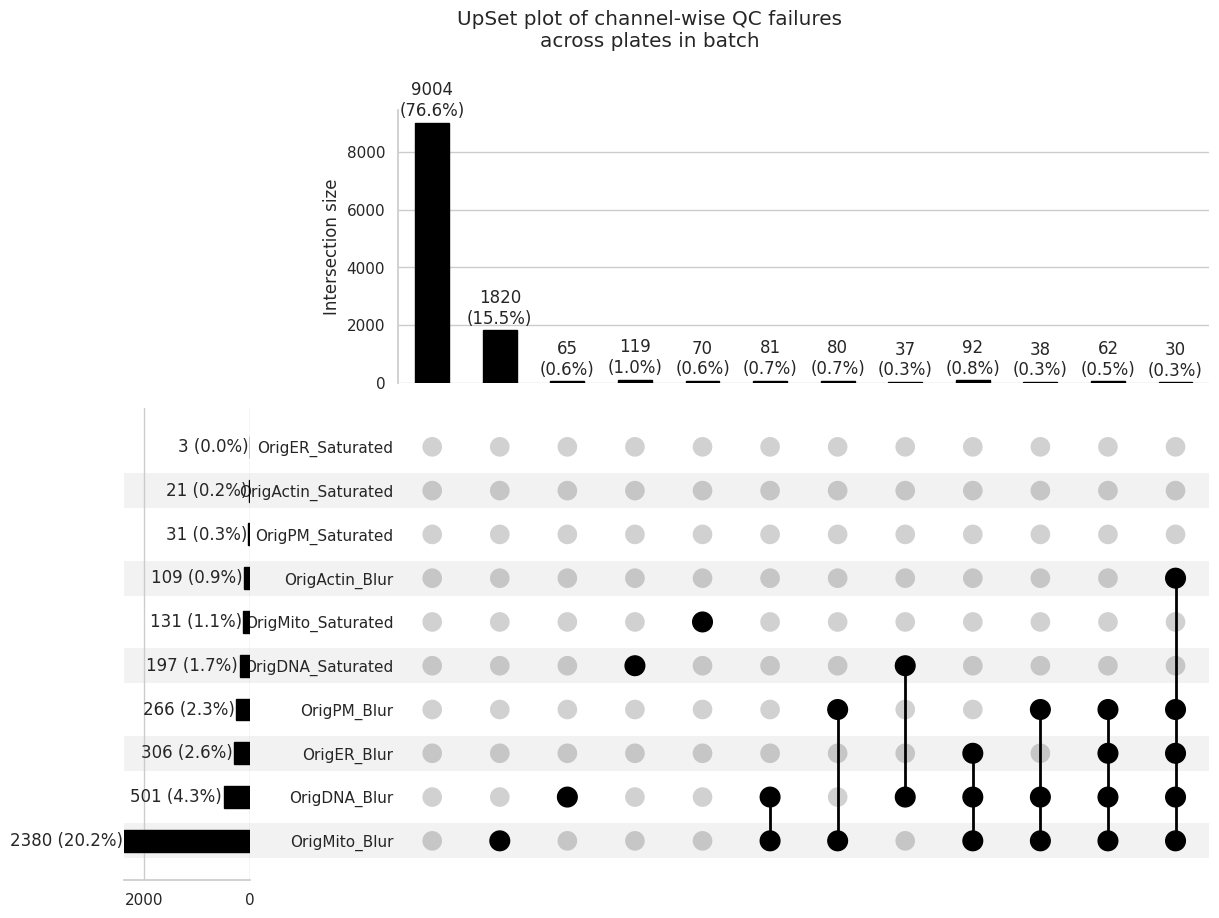

In [8]:
# Define the relevant QC columns
qc_columns = [
    "OrigActin_Saturated",
    "OrigDNA_Saturated",
    "OrigER_Saturated",
    "OrigMito_Saturated",
    "OrigPM_Saturated",
    "OrigActin_Blur",
    "OrigDNA_Blur",
    "OrigER_Blur",
    "OrigMito_Blur",
    "OrigPM_Blur",
]

# Make sure columns are boolean
qc_data = combined_df[qc_columns].astype(bool)

# Create the upset input
upset_data = from_indicators(qc_columns, qc_data)

# Create the figure with desired size
fig = plt.figure(figsize=(14, 10))  # Adjust the size as needed

# Plot the UpSet plot
plot(
    upset_data,
    fig=fig,
    element_size=None,
    show_counts=True,
    show_percentages=True,
    min_subset_size=30,
)
plt.suptitle("UpSet plot of channel-wise QC failures\nacross plates in batch")
plt.savefig(
    output_directory / "upset_plot_channel_qc_failures.png",
    bbox_inches="tight",
    dpi=500,
)
plt.show()

## Generate heatmap to visualize which channels and conditions most impact the failing image sets

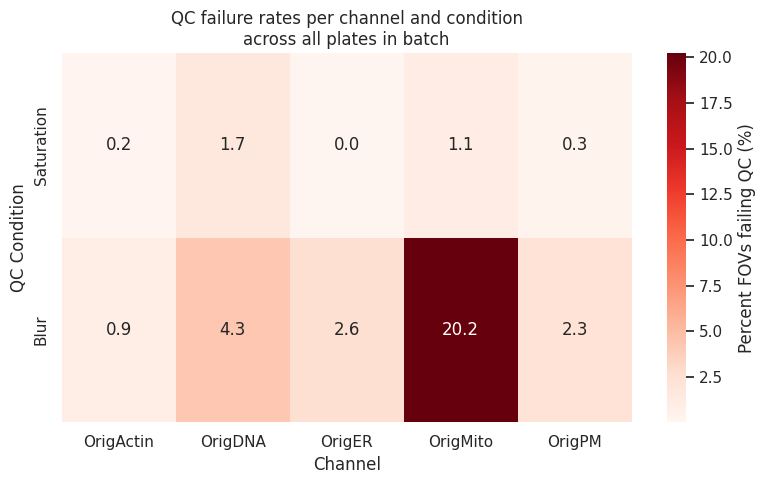

In [9]:
# Get boolean DataFrames for saturation and blur separately
sat_cols = [col for col in qc_columns if col.endswith("_Saturated")]
blur_cols = [col for col in qc_columns if col.endswith("_Blur")]

# Extract saturation and blur DataFrames
sat_df = qc_data[sat_cols]
blur_df = qc_data[blur_cols]

# Align columns so we can compare channels directly (remove suffixes for matching)
sat_df.columns = [col.replace("_Saturated", "") for col in sat_df.columns]
blur_df.columns = [col.replace("_Blur", "") for col in blur_df.columns]

# Calculate per-channel failure rates for each condition
sat_fail_rate = sat_df.mean() * 100
blur_fail_rate = blur_df.mean() * 100

# Combine into one DataFrame for plotting
heatmap_data = pd.DataFrame(
    {
        "Saturation": sat_fail_rate,
        "Blur": blur_fail_rate,
    }
)

plt.figure(figsize=(8, 5))
sns.heatmap(
    heatmap_data.T,
    annot=True,
    fmt=".1f",
    cmap="Reds",
    cbar_kws={"label": "Percent FOVs failing QC (%)"},
)
plt.title("QC failure rates per channel and condition\nacross all plates in batch")
plt.xlabel("Channel")
plt.ylabel("QC Condition")
plt.tight_layout()
plt.savefig(output_directory / "qc_failure_rates_heatmap.png", dpi=500)
plt.show()

## Check only the images from healthy wells and see what is the biggest reason images are failing QC

In [10]:
# Filter for healthy wells
healthy_wells = ["B02", "B05", "B08", "B11"]
healthy_df = combined_df[combined_df["Metadata_Well"].isin(healthy_wells)]

# Get total FOVs per well
total_per_well = (
    healthy_df.groupby("Metadata_Well").size().reset_index(name="Total_FOVs")
)

# Prepare melted DataFrame
melted = healthy_df.melt(
    id_vars=["Metadata_Well"],
    value_vars=qc_columns,
    var_name="QC_Channel_Condition",
    value_name="Failed",
)

# Only failed
failed_melted = melted[melted["Failed"]].copy()

# Split channel and condition
failed_melted[["Channel", "Condition"]] = failed_melted[
    "QC_Channel_Condition"
].str.extract(r"(Orig\w+)_(Saturated|Blur)")

# Count number failed per well/channel/condition
failed_counts = (
    failed_melted.groupby(["Metadata_Well", "Channel", "Condition"])
    .size()
    .reset_index(name="Failed_Count")
)

# Merge with total to get percentages
percentages = failed_counts.merge(total_per_well, on="Metadata_Well")
percentages["Percent_Failed"] = (
    100 * percentages["Failed_Count"] / percentages["Total_FOVs"]
)

# Sort (optional)
percentages = percentages.sort_values(["Metadata_Well", "Condition", "Channel"])

# Show some data
percentages.head()

,Metadata_Well,Channel,Condition,Failed_Count,Total_FOVs,Percent_Failed
0,B02,OrigActin,Blur,7,196,3.571429
2,B02,OrigDNA,Blur,18,196,9.183673
3,B02,OrigER,Blur,7,196,3.571429
4,B02,OrigMito,Blur,78,196,39.795918
6,B02,OrigPM,Blur,9,196,4.591837


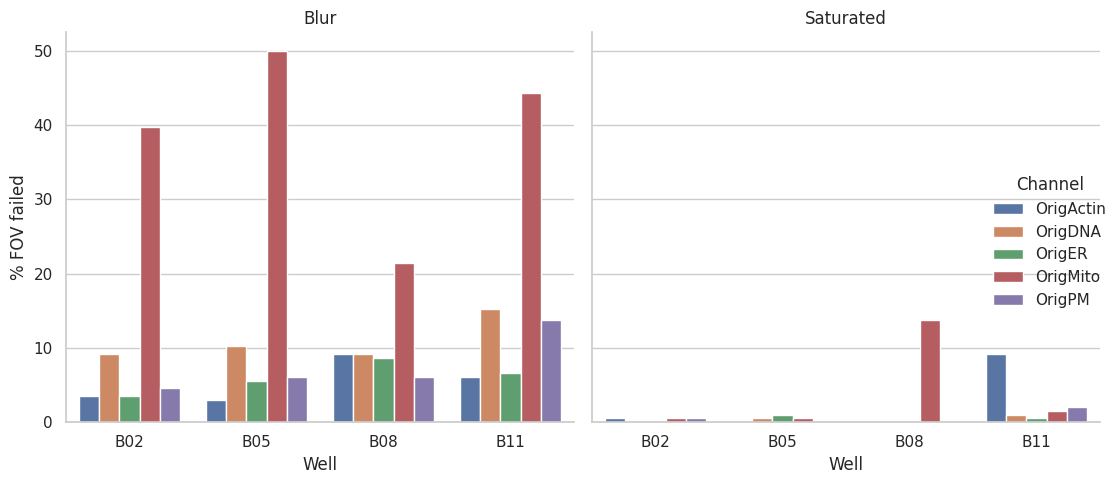

In [11]:
# Create a bar plot for healthy wells
g = sns.catplot(
    data=percentages,
    x="Metadata_Well",
    y="Percent_Failed",
    hue="Channel",
    col="Condition",
    kind="bar",
    height=5,
    aspect=1,
)

g.set_axis_labels("Well", "% FOV failed")
g.set_titles("{col_name}")
plt.tight_layout()
plt.savefig(output_directory / "qc_failure_healthy_wells.png", dpi=500)
plt.show()